<a href="https://colab.research.google.com/github/fmezacr/machinelearning/blob/main/Tutorial_Diferencias_entre_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


---

<div style="font-size:small;">

MIT License

Copyright (c) [2024] Felipe Meza-Obando

*Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software for educational purposes only. You must give author appropriate credit, provide a link to the license and source, and indicate if changes were made.*
</div>

---

#**Tutorial: Diferencias entre Datasets de Baja, Mediana y Alta Dificultad en Machine Learning**
### Autor: ***Felipe Meza-Obando***

### **1. Introducción**
La elección de un dataset influye directamente en la complejidad del modelo de Machine Learning necesario para obtener buenos resultados. A grandes rasgos, los datasets pueden clasificarse según su dificultad en:
- **Baja Dificultad:** Relación lineal entre variables, datos balanceados, pocos ruidos o valores atípicos.
- **Mediana Dificultad:** Relaciones más complejas, posibles interacciones no lineales, datos con algún grado de ruido.
- **Alguna Dificultad:** Alta dimensionalidad, relaciones no lineales, ruido significativo, clases desbalanceadas.

Este tutorial aborda estas diferencias con ejemplos prácticos en Python.

### **2. Datasets de Baja Dificultad**
#### **Características:**
- Relaciones lineales entre las variables.
- Baja dimensionalidad (pocas características).
- Bien balanceados.
- Sin ruido significativo.

#### **Ejemplo en Python: Clasificación Lineal Simple con Datos Sintéticos**

Precisión (Baja Dificultad): 0.88


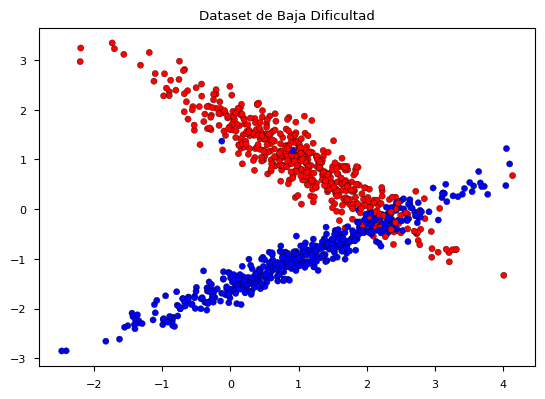

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
plt.style.use("seaborn-v0_8-paper")

# Generar un dataset de baja dificultad (relación lineal)
X, y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo de regresión logística (lineal)
model = LogisticRegression()
model.fit(X_train, y_train)

# Predecir y calcular precisión
y_pred = model.predict(X_test)
print(f"Precisión (Baja Dificultad): {accuracy_score(y_test, y_pred):.2f}")

# Visualización del dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', s=20)
plt.title('Dataset de Baja Dificultad')
plt.show()

#### **Observaciones:**
- Este dataset tiene una separación lineal clara, lo que facilita que un modelo simple como la regresión logística logre una alta precisión.
- Este tipo de dataset no requiere algoritmos complejos.

#### **Otro Ejemplo de Dataset de Baja Dificultad: Iris Dataset**

El dataset de **Iris** es uno de los más conocidos en la ciencia de datos. Contiene tres clases de flores (Iris-setosa, Iris-versicolor e Iris-virginica) basadas en cuatro características: largo y ancho del sépalo y del pétalo.


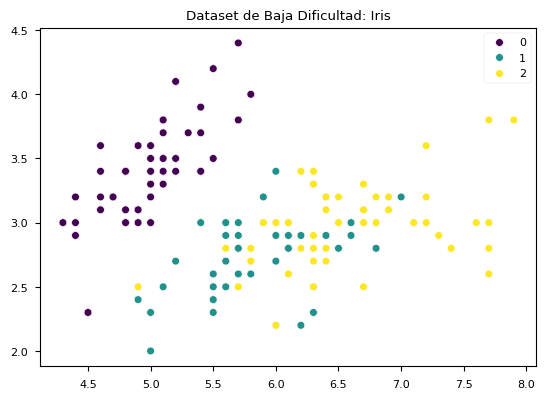

Exactitud en el conjunto de prueba: 1.00


In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

# Cargamos el dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

# Visualizamos las primeras dos características para ver la separación de clases
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='viridis')
plt.title('Dataset de Baja Dificultad: Iris')
plt.show()

# Dividimos el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenamos un modelo de Regresión Logística
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud en el conjunto de prueba: {accuracy:.2f}")

#### **Observaciones**:
- El **dataset Iris** tiene clases bien separadas y un modelo como la **regresión logística** puede aprender con facilidad las relaciones entre las características y las etiquetas, logrando una alta exactitud.


### **3. Datasets de Mediana Dificultad**
#### **Características:**
- Posibles relaciones no lineales.
- Puede tener ruido, pero no dominante.
- Dimensionalidad media (más características).
- Leve desbalance entre clases.

#### **Ejemplo en Python: Clasificación con Relaciones No Lineales**

Precisión (Mediana Dificultad): 0.98


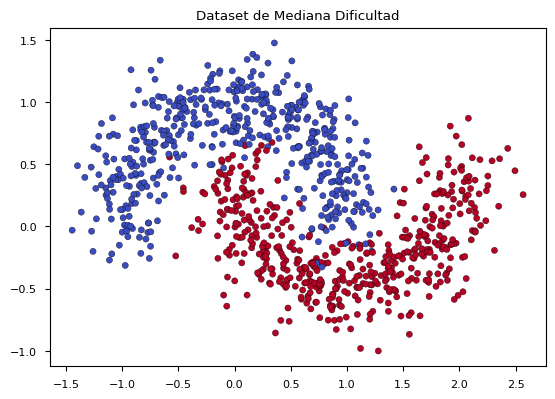

In [ ]:
from sklearn.datasets import make_moons
from sklearn.svm import SVC

# Generar un dataset no lineal (mediana dificultad)
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Usar un clasificador SVM con kernel radial para capturar la no linealidad
model = SVC(kernel='rbf', gamma=0.5)
model.fit(X_train, y_train)

# Predecir y calcular precisión
y_pred = model.predict(X_test)
print(f"Precisión (Mediana Dificultad): {accuracy_score(y_test, y_pred):.2f}")

# Visualización del dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=20)
plt.title('Dataset de Mediana Dificultad')
plt.show()

#### **Observaciones:**
- Este dataset tiene relaciones no lineales entre las clases, por lo que un clasificador lineal no sería suficiente.
- Un **SVM con kernel** se adapta mejor a este tipo de problemas.
- El dataset presenta algo de ruido, lo que complica un poco la tarea del modelo.


#### **Otro Ejemplo de Dataset de Mediana Dificultad: Wine Quality**

El dataset de **Wine Quality** contiene características químicas de diferentes tipos de vino (tinto y blanco), y la tarea consiste en predecir la calidad del vino (clasificación en una escala de 0 a 10).


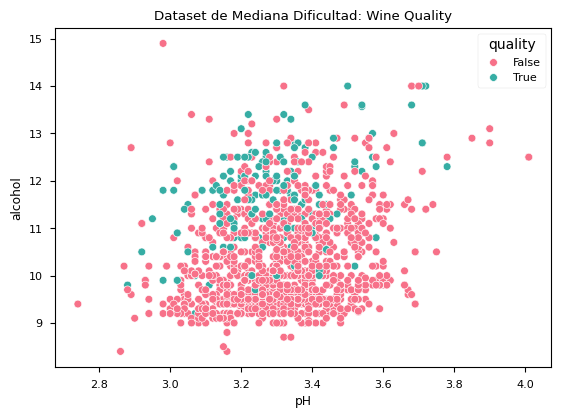

Exactitud en el conjunto de prueba: 0.86


In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import seaborn as sns

# Cargamos el dataset Wine Quality
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
wine = pd.read_csv(url, delimiter=';')

# Seleccionamos las características (X) y la etiqueta de calidad (y)
X = wine.drop('quality', axis=1)
y = wine['quality'] > 6  # Convertimos la calidad en una clasificación binaria (>6 es buen vino)

# Visualizamos la relación entre dos características (pH y alcohol) para observar la complejidad
sns.scatterplot(x=X['pH'], y=X['alcohol'], hue=y, palette='husl')
plt.title('Dataset de Mediana Dificultad: Wine Quality')
plt.show()

# Dividimos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenamos un modelo SVM con kernel RBF
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud en el conjunto de prueba: {accuracy:.2f}")




#### **Observaciones**:
- Este dataset presenta una relación menos clara entre las características y las etiquetas. El uso de un **SVM con kernel RBF** es más adecuado para capturar las relaciones no lineales entre las variables y la calidad del vino.

---

### **4. Datasets con Alguna Dificultad**
#### **Características:**
- Alta dimensionalidad.
- Relaciones no lineales complejas.
- Clases desbalanceadas.
- Ruido significativo y valores atípicos.

#### **Ejemplo en Python: Clasificación con Desbalance y Ruido**

Precisión (Alta Dificultad): 0.81
Matriz de Confusión:
[[464  11]
 [105  20]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.82      0.98      0.89       475
           1       0.65      0.16      0.26       125

    accuracy                           0.81       600
   macro avg       0.73      0.57      0.57       600
weighted avg       0.78      0.81      0.76       600



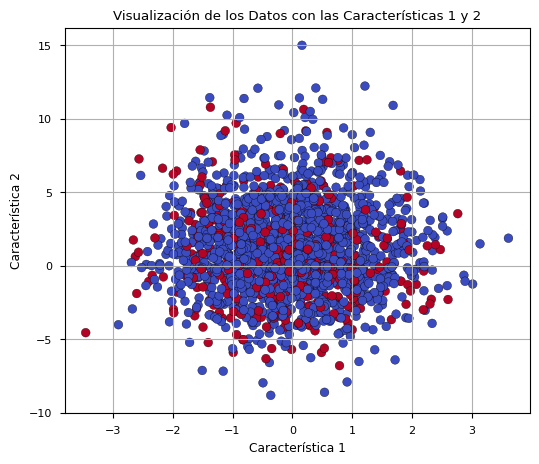

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Generar un dataset de alta dificultad
X, y = make_classification(n_samples=2000, n_features=20, n_informative=10, n_redundant=5, n_classes=2, weights=[0.9, 0.1], flip_y=0.3, random_state=42)

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Usar un clasificador más complejo (Random Forest)
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

# Predecir y calcular precisión
y_pred = model.predict(X_test)
print(f"Precisión (Alta Dificultad): {accuracy_score(y_test, y_pred):.2f}")

# Mostrar matriz de confusión y reporte de clasificación
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Visualización de los datos usando las dos primeras características originales
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=40)
plt.title("Visualización de los Datos con las Características 1 y 2")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.grid(True)
plt.show()


#### **Observaciones:**
- Este dataset tiene una alta **dimensionalidad** (20 características), clases **desbalanceadas** y **ruido**, lo que aumenta su dificultad.
- Un **Random Forest** maneja bien este tipo de problemas complejos, capturando relaciones no lineales y manejando datos ruidosos.
- A pesar de un modelo más complejo, puede que la precisión no sea tan alta debido al ruido y desbalance.

#### **Otro Ejemplo de Dataset con Dificultad: Higgs Boson**

El **Higgs Boson Dataset** es un conjunto de datos extraído de experimentos de física de partículas. El problema del dataset de Higgs consiste en clasificar eventos producidos en experimentos de física de partículas para determinar si están asociados con la producción del bosón de Higgs. Los datos presentan alta dimensionalidad, relaciones no lineales entre características, y un considerable nivel de ruido, lo que complica el entrenamiento requiere algoritmos avanzados como bosques aleatorios o redes neuronales para obtener predicciones precisas.


n_estimators: 10 - Tiempo de entrenamiento: 6.20 segundos - Exactitud: 0.6744
n_estimators: 50 - Tiempo de entrenamiento: 33.19 segundos - Exactitud: 0.7111
n_estimators: 100 - Tiempo de entrenamiento: 65.75 segundos - Exactitud: 0.7182
n_estimators: 200 - Tiempo de entrenamiento: 131.55 segundos - Exactitud: 0.7229
n_estimators: 500 - Tiempo de entrenamiento: 327.50 segundos - Exactitud: 0.7247


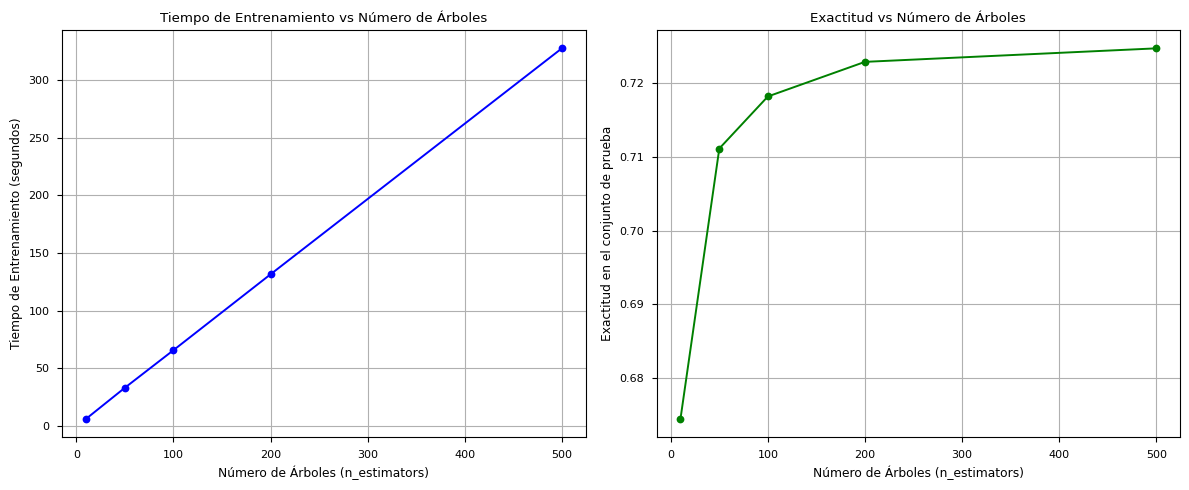

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import time

# Cargamos el dataset de Higgs Boson (solo las primeras 100000 filas para reducir el tiempo de cómputo)
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00280/HIGGS.csv.gz'
cols = ['label'] + [f'feature_{i}' for i in range(1, 29)]
higgs = pd.read_csv(url, names=cols, nrows=100000)

# Seleccionamos las características (X) y la etiqueta (y)
X = higgs.drop('label', axis=1)
y = higgs['label']

# Dividimos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Lista para almacenar tiempos y precisiones
n_estimators = [10, 50, 100, 200, 500]
train_times = []
accuracies = []

# Entrenamos el modelo Random Forest con diferentes números de árboles (estimators) y medimos el tiempo
for n in n_estimators:
    start_time = time.time()  # Iniciar el temporizador
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    end_time = time.time()  # Finalizar el temporizador

    # Medimos el tiempo de entrenamiento y lo almacenamos
    train_time = end_time - start_time
    train_times.append(train_time)

    # Hacemos predicciones y calculamos la exactitud
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    # Imprimimos los resultados de cada experimento
    print(f"n_estimators: {n} - Tiempo de entrenamiento: {train_time:.2f} segundos - Exactitud: {accuracy:.4f}")

# Graficamos el tiempo de entrenamiento y la precisión en función del número de estimadores
plt.figure(figsize=(12, 5))

# Gráfico del tiempo de entrenamiento
plt.subplot(1, 2, 1)
plt.plot(n_estimators, train_times, marker='o', linestyle='-', color='b')
plt.title('Tiempo de Entrenamiento vs Número de Árboles')
plt.xlabel('Número de Árboles (n_estimators)')
plt.ylabel('Tiempo de Entrenamiento (segundos)')
plt.grid(True)

# Gráfico de la precisión
plt.subplot(1, 2, 2)
plt.plot(n_estimators, accuracies, marker='o', linestyle='-', color='g')
plt.title('Exactitud vs Número de Árboles')
plt.xlabel('Número de Árboles (n_estimators)')
plt.ylabel('Exactitud en el conjunto de prueba')
plt.grid(True)

plt.tight_layout()
plt.show()


#### **Observaciones**:
- Este dataset es mucho más complejo debido a la gran cantidad de características y la naturaleza no lineal de los datos, ademas que su proceso de entrenaineto tomamas tiempo. Un modelo como **Random Forest** ayuda a capturar las interacciones complejas entre las variables y a manejar el ruido o inclusive podria pensarse en un modelo neuronal.


### **5. Conclusiones Finales**
- **Baja Dificultad:** Los datasets con separaciones lineales y pocas características se pueden abordar con modelos simples (como regresión logística). La generalización es sencilla, ya que no se requiere un límite de decisión complejo.
- **Mediana Dificultad:** Los datasets con relaciones no lineales requieren algoritmos más avanzados, como SVM con kernel, y tienen más ruido o interacciones no triviales entre características.
- **Alguna Dificultad:** Los datasets con alta dimensionalidad, ruido significativo, y clases desbalanceadas requieren modelos complejos como Random Forests o Redes Neuronales. Además, se debe prestar atención a la selección de características, balanceo de clases y técnicas para manejar el ruido.

### **6. Consideraciones Finales**
Al elegir un dataset, es importante tener en cuenta su dificultad para seleccionar el algoritmo adecuado:
- Un **modelo simple** puede ser suficiente para datos de baja dificultad, pero fallará en datos más complejos.
- Los **algoritmos complejos** como Random Forest o Redes Neuronales son necesarios para datasets de alta dificultad, pero pueden sobreajustar en datos más sencillos.
- Es crucial comprender la **dificultad inherente** del dataset antes de elegir un modelo de aprendizaje. Datasets con clases claramente separadas o con una baja dimensionalidad pueden ser resueltos con modelos simples, mientras que aquellos con relaciones no lineales o mucho ruido requieren modelos más sofisticados.
- El análisis exploratorio y la visualización de datos ayudan a identificar la complejidad del problema y a guiar la selección del modelo más adecuado.
- En datasets grandes y complejos como el de **Higgs**, el tiempo de entrenamiento puede aumentar drásticamente con modelos avanzados como **Random Forest** o redes neuronales. Es importante encontrar un balance entre la **precisión** y el **costo computacional**. Herramientas como los temporizadores y las gráficas de rendimiento pueden ayudar a evaluar esta relación.
- En el caso de algoritmos como Random Forest, aumentar el número de estimadores mejora la precisión solo hasta cierto punto, tras el cual los beneficios adicionales disminuyen. Esto se refleja en el trade-off entre mayor precisión y mayor tiempo de entrenamiento.
- Es recomendable ajustar el número de árboles o estimadores de forma óptima utilizando técnicas como la validación cruzada para evitar desperdiciar recursos computacionales sin obtener mejoras significativas.
- La visualización de métricas como el **tiempo de entrenamiento** y la **precisión** en función de los hiperparámetros ayuda a tomar decisiones más informadas sobre el modelo y sus configuraciones.
- Además, la **visualización de los datos** antes del modelado (como hicimos con Iris y Wine) proporciona un entendimiento preliminar de la dificultad del problema y posibles relaciones entre las variables.
- En problemas complejos, hay un riesgo de **overfitting**, donde el modelo se ajusta demasiado a los datos de entrenamiento, perdiendo capacidad de generalización. Es esencial monitorizar las métricas de desempeño en el conjunto de pruebas para asegurar que el modelo generalice bien y no solo funcione bien en los datos de entrenamiento.
- En datasets como el de **Higgs**, donde existen muchas características, es importante aplicar técnicas de **preprocesamiento** como la normalización o estandarización de las características, para asegurar que los modelos no se vean afectados por escalas de variables muy diferentes.
- Para datasets extremadamente grandes como el de **Higgs** (donde se pueden tener millones de filas y decenas de características), es importante considerar opciones de **alto poder poder computacional (por ejemplo con GPU)** o entrenar los modelos en la nube para reducir el tiempo de cómputo y poder entrenar con datasets completos sin comprometer los recursos locales.

